In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import requests

# Airlines

In [2]:
TICKS = ['ELAL.TA', #Israel 
            'LHA.DE', #Lufthansa (Europe - Germany)
                'QAN.AX', #Qantas (Australia)
                    'DAL', #Delta Airlines (North America)
                    ] 

TICKS_NAMES = ['El Al', 'Lufthansa', 'Qantas', 'Delta Airlines']

In [3]:
def get_data(ticker, start="2014-07-01", end="2024-07-02"):
    data = yf.Ticker(ticker)
    return data.history(start=start, end=end)

def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [4]:
data = get_data('ELAL.TA')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-01 00:00:00+03:00,292.362354,298.815189,290.873234,296.829712,51837,0.0,0.0
2014-07-02 00:00:00+03:00,296.829693,299.311503,290.873216,292.362335,54954,0.0,0.0
2014-07-03 00:00:00+03:00,292.362322,297.326036,288.887726,288.887726,115792,0.0,0.0
2014-07-06 00:00:00+03:00,288.887755,295.836948,288.887755,293.851471,42771,0.0,0.0
2014-07-07 00:00:00+03:00,297.822372,297.822372,285.413133,286.902252,93962,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-25 00:00:00+03:00,431.100006,436.799988,423.000000,430.000000,1976270,0.0,0.0
2024-06-26 00:00:00+03:00,430.000000,434.899994,413.000000,418.899994,4076785,0.0,0.0
2024-06-27 00:00:00+03:00,413.000000,421.899994,413.000000,416.000000,1632421,0.0,0.0


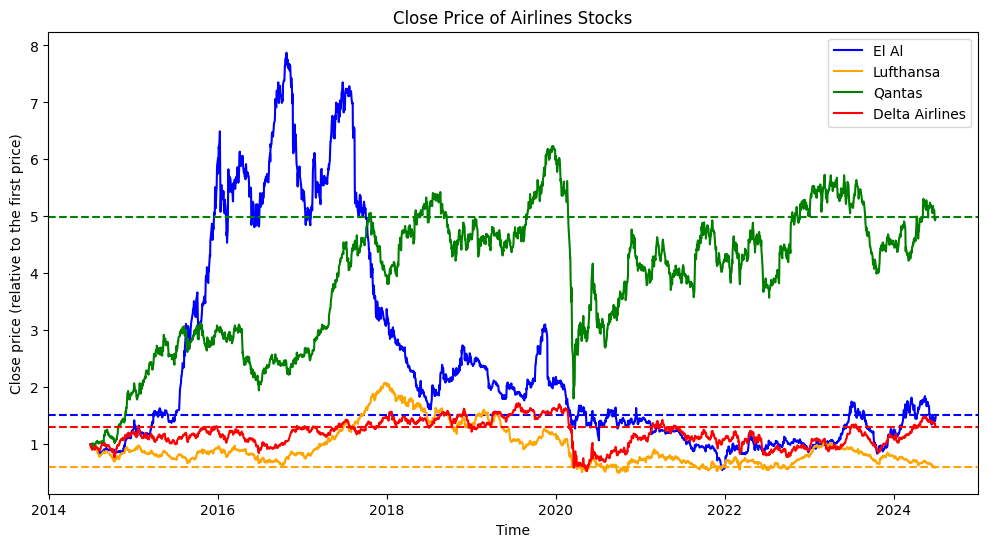

In [5]:
warnings.filterwarnings("ignore")
colors = ['blue', 'orange', 'green', 'red', 'purple']


def plot_data(TICKS, TICKS_NAMES, colors, title, start="2014-07-01", end="2024-07-02"):
    plt.figure(figsize=(12, 6))
    for ticker, color, ticker_name in zip(TICKS, colors, TICKS_NAMES):
        data = get_data(ticker, start, end)
        base_price = data['Close'][0]
        close_price = data['Close'] / base_price
        plt.plot(close_price, label=ticker_name, color=color)
        # plot horizonal dotted line from the last point, in the corresposind color
        plt.axhline(y=close_price[-1], color=color, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Close price (relative to the first price)')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of Airlines Stocks')

### Covid 19 Case \#

In [6]:
# Define the function to fetch data for a given country
def fetch_covid_data(country):
    url = f'https://disease.sh/v3/covid-19/historical/{country}?lastdays=all'
    response = requests.get(url)
    data = response.json()
    
    # Extract the timeline data
    cases = data['timeline']['cases']
    deaths = data['timeline']['deaths']
    recovered = data['timeline']['recovered']
    
    # Convert the data to a DataFrame for easier manipulation
    covid_df = pd.DataFrame({
        'Date': list(cases.keys()),
        'Cases': list(cases.values()),
        'Deaths': list(deaths.values()),
        'Recovered': list(recovered.values())
    })
    
    # Convert the date column to datetime
    covid_df['Date'] = pd.to_datetime(covid_df['Date'])
    
    return covid_df

In [7]:
# Fetch data for each country
countries = ['Israel','Germany', 'Australia', 'USA']
covid_dfs = []

for country in countries:
    df = fetch_covid_data(country)
    covid_dfs.append(df)

In [18]:
covid_dfs[0]

,Date,Cases,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
1138,2023-03-05,4801502,12307,0
1139,2023-03-06,4801502,12307,0
1140,2023-03-07,4801502,12307,0
1141,2023-03-08,4803164,12325,0


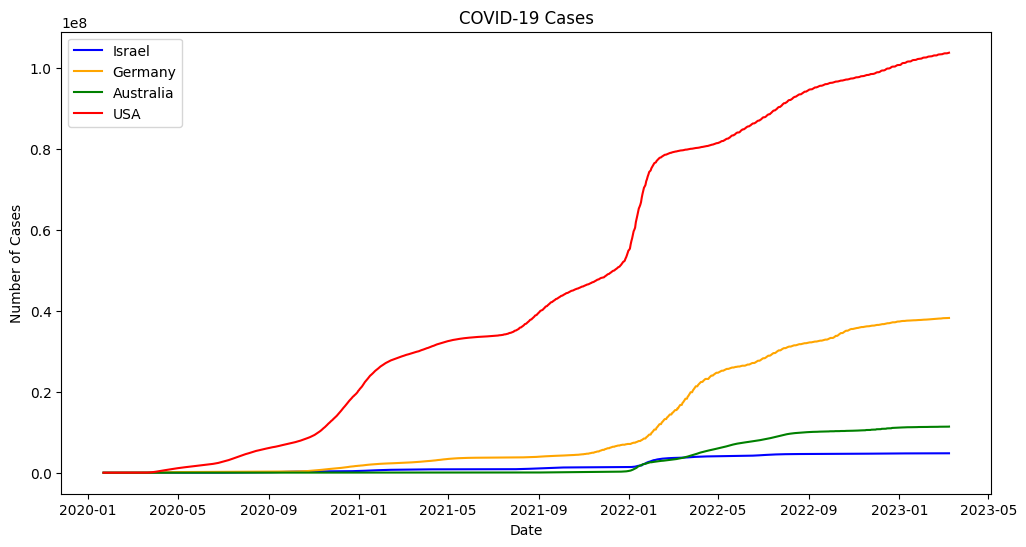

In [8]:
# Plot the COVID-19 cases for each country
plt.figure(figsize=(12, 6))
for df, country, color in zip(covid_dfs, countries, colors):
    plt.plot(df['Date'], df['Cases'], label=country, color=color)

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases')
plt.legend()
plt.show()

### Boeing Stock Price

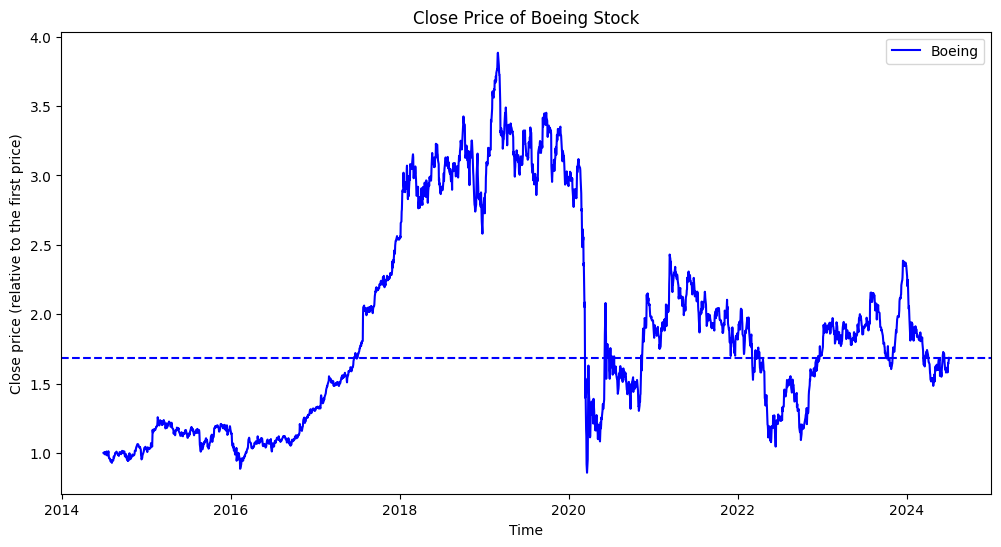

In [16]:
TICKS = ['BA']
TICKS_NAMES = ['Boeing']
plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of Boeing Stock', start="2014-07-01", end="2024-07-02")

### Jet Fuel Costs

 Kerosene-Type Jet Fuel Prices: U.S. Gulf Coast (DJFUELUSGULF)	

In [10]:
jet_fuel_df = pd.read_csv('data/jet_fuel_prices.csv')

jet_fuel_df['DATE'] = pd.to_datetime(jet_fuel_df['DATE'])

# Filter dates between 2014-07-01 and 2024-07-02 (inclusive)
start_date = '2014-06-01'
end_date = '2024-06-02'
filtered_jet_fuel_df = jet_fuel_df[(jet_fuel_df['DATE'] >= start_date) & (jet_fuel_df['DATE'] <= end_date)]


In [11]:
filtered_jet_fuel_df.head(20)

,DATE,DJFUELUSGULF
1,2014-06-02,2.805
2,2014-06-03,2.793
3,2014-06-04,2.779
4,2014-06-05,2.812
5,2014-06-06,2.807
6,2014-06-09,2.818
7,2014-06-10,2.800
8,2014-06-11,2.816
9,2014-06-12,2.905
10,2014-06-13,2.905


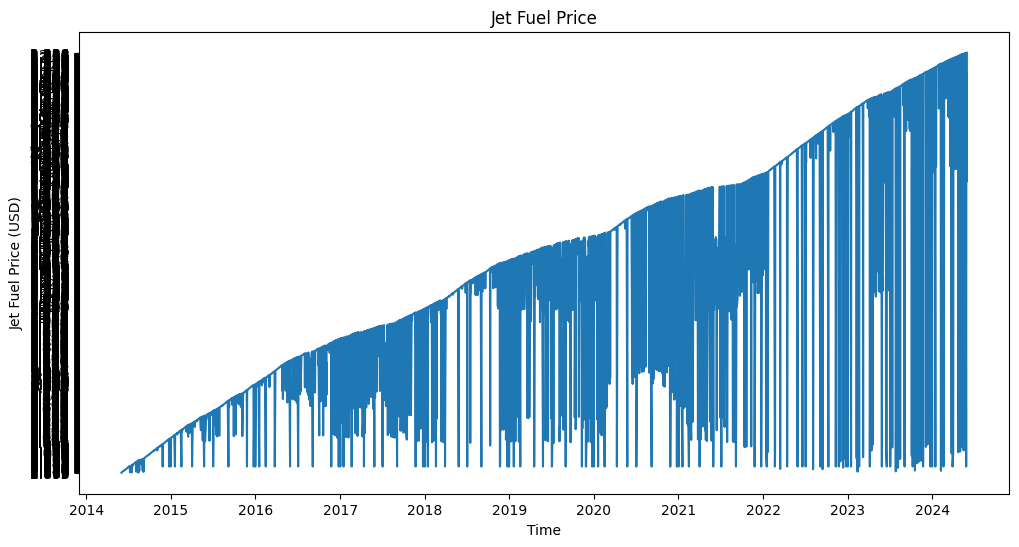

In [12]:
# plot jet fuel prices
plt.figure(figsize=(12, 6))
plt.plot(filtered_jet_fuel_df['DATE'], filtered_jet_fuel_df['DJFUELUSGULF'])
plt.xlabel('Time')
plt.ylabel('Jet Fuel Price (USD)')
plt.title('Jet Fuel Price')
plt.show()

# Social Media

In [13]:
TICKS = ['META',
         'SNAP',
         'PINS'
         ]

TICKS_NAMES = ['Meta', 'Snap', 'Pinterest']

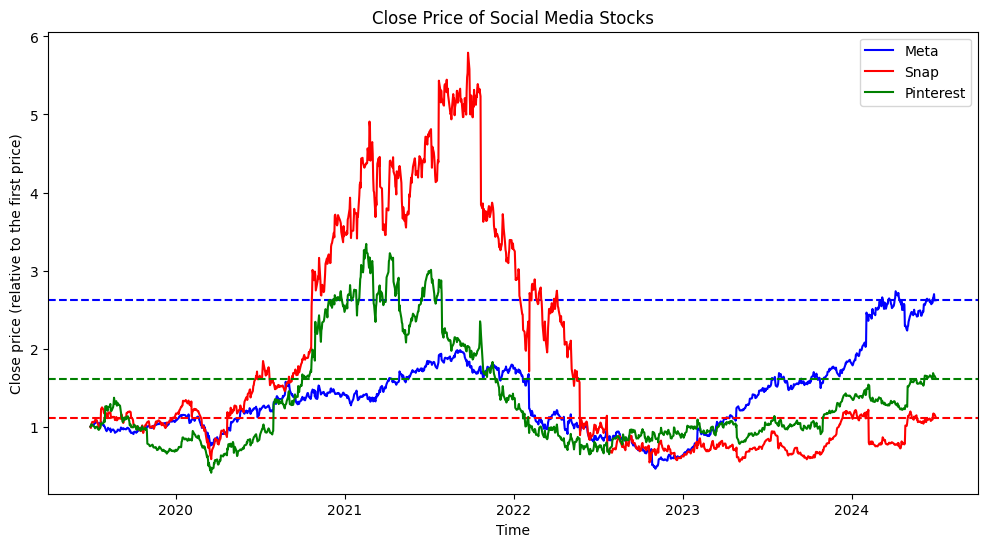

In [14]:
colors = ['blue', 'red', 'green']
plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of Social Media Stocks', start="2019-07-01", end="2024-07-02")

### CPI

In [17]:
from bs4 import BeautifulSoup

url = 'https://www.bls.gov/cpi/'

# Send a GET request to the URL
response = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the CPI data table
table = soup.find('table', class_='regular-data')

if table:
    # Extract data from the table
    rows = table.find_all('tr')
    for row in rows:
        # Extracting year and CPI value
        cols = row.find_all('td')
        if len(cols) > 1:
            year = cols[0].text.strip()
            cpi_value = cols[1].text.strip()
            print(f"Year: {year}, CPI Value: {cpi_value}")
else:
    print("Could not find CPI data table on the page.")

Could not find CPI data table on the page.
